# Install MQTT Library

With Conda (if you are using Anaconda)

In [12]:
import sys
!conda install -y -p {sys.prefix} -c conda-forge paho-mqtt

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


With Pip

In [13]:
!pip install paho-mqtt

Verify that we have the library properly installed

The following code block should not generate an error

In [1]:
import paho.mqtt.client as mqtt

# Parameters

In [2]:
# Replace with your matric ID
YOUR_MATRIC_ID = 'A0260074M'
# Note that the sensor publishes a reading every minute
NUM_SAMPLES = 100

# The following does not need to be changed
MQTT_HOST = '10.246.112.87'
MQTT_SUBPATH = 'ee4211/'
MQTT_SENSOR = 'light_sensor_0/brightness_lux'

# Data Collection

Define callback function used to collect published data

In [3]:
from datetime import datetime

readings = []
def collect_received(c, u, msg):
    # Two columns, 'timestamp' and 'brightness_lux'
    reading = {}
    # Add local timestamp
    reading['timestamp'] = datetime.now().isoformat()
    # The reading is contained in msg.payload
    reading['brightness_lux'] = msg.payload
    # Cast the reading into an integer
    reading['brightness_lux'] = int(reading['brightness_lux'])
    print('Got reading:', end=' ')
    print(reading)
    # Append it to the 'readings' list
    readings.append(reading)

Generate anonymised ID for connection to MQTT server

In [4]:
import hashlib
MQTT_ID = YOUR_MATRIC_ID.lower().strip()
MQTT_ID = hashlib.sha256(MQTT_ID.encode()).hexdigest()[-16:]

Connect to MQTT server

In [5]:
import paho.mqtt.client as mqtt
client = mqtt.Client(client_id=MQTT_ID)
# Attach the on_message callback to the collect_received() function
client.on_message = collect_received
client.connect(MQTT_HOST)
client.loop_start()

readings = []

MQTT_TOPIC = MQTT_SUBPATH + MQTT_ID + '/' + MQTT_SENSOR
client.subscribe(MQTT_TOPIC)
print('Subscribed to topic:', end=' ')
print(MQTT_TOPIC)

from time import sleep
while len(readings) < NUM_SAMPLES:
    sleep(1)
client.disconnect()
client.loop_stop()
print('Number of readings obtained:', end=' ')
print(len(readings))

Subscribed to topic: ee4211/b850799775aff812/light_sensor_0/brightness_lux
Got reading: {'timestamp': '2022-10-25T22:03:01.241843', 'brightness_lux': 20296}
Got reading: {'timestamp': '2022-10-25T22:04:01.350283', 'brightness_lux': 20091}
Got reading: {'timestamp': '2022-10-25T22:05:01.234085', 'brightness_lux': 19207}
Got reading: {'timestamp': '2022-10-25T22:06:01.463719', 'brightness_lux': 949}
Got reading: {'timestamp': '2022-10-25T22:07:01.573432', 'brightness_lux': 993}
Got reading: {'timestamp': '2022-10-25T22:08:01.984183', 'brightness_lux': 20103}
Got reading: {'timestamp': '2022-10-25T22:09:01.815031', 'brightness_lux': 995}
Got reading: {'timestamp': '2022-10-25T22:10:01.955300', 'brightness_lux': 967}
Got reading: {'timestamp': '2022-10-25T22:11:02.105007', 'brightness_lux': 996}
Got reading: {'timestamp': '2022-10-25T22:12:02.315846', 'brightness_lux': 976}
Got reading: {'timestamp': '2022-10-25T22:13:02.371797', 'brightness_lux': 953}
Got reading: {'timestamp': '2022-10-2

KeyboardInterrupt: 

In [6]:
client.disconnect()
client.loop_stop()

Wait for the required number of readings to accumulate and disconnect.

If you do not see any readings being collected within 5 minutes, something is wrong. Check that you have your matric id filled in correctly.

Dump the readings to a JSON file for offline processing

In [7]:
import json
with open('readings_10.27.json', 'w') as f:
    json.dump(readings, f)

# Data Processing

Write your data processing functions to determine the **distribution** of the readings and its **parameters**.

Your normal data visualisation and processing libraries such as seaborn, pandas and numpy are available.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import json

# import data from json
filename = 'IoT_assignment.json'
with open(filename, 'r') as f:
    readings = json.load(f)

In [2]:
print(readings[0])

{'timestamp': '2022-10-25T18:21:29.446886', 'brightness_lux': 1011}


In [3]:
df = pd.read_json(filename)
display(df)

,timestamp,brightness_lux
0,2022-10-25 18:21:29.446886,1011
1,2022-10-25 18:22:29.568432,949
2,2022-10-25 18:23:29.714146,19612
3,2022-10-25 18:24:29.863718,20418
4,2022-10-25 18:25:30.001263,973
...,...,...
188,2022-10-25 22:19:03.286957,975
189,2022-10-25 22:20:03.361757,973
190,2022-10-25 22:21:03.504872,20284
191,2022-10-25 22:22:03.919148,20507


In [4]:
# remove timestamp
df_brightness = df.iloc[:,[1]].astype(int)
display(df_brightness)

,brightness_lux
0,1011
1,949
2,19612
3,20418
4,973
...,...
188,975
189,973
190,20284
191,20507


In [5]:
br = df_brightness.values.tolist()
br = np.array(br)
print(br.shape)

(193, 1)


In [7]:
# draw distribution histogram
def draw_distribution_histogram(nums, bins, st, end, is_hist=True, is_kde=True, is_rug=False, \
    is_vertical=False, is_norm_hist=False):

    sns.set()  
    sns.distplot(nums, bins, hist=is_hist, kde=is_kde, rug=is_rug, \
    hist_kws={"color":"steelblue"}, kde_kws={"color":"purple"}, \
    vertical=is_vertical, norm_hist=is_norm_hist)

    plt.xlabel("brightness lux")
    plt.ylabel("frequency")


    plt.title("Distribution")
    plt.tight_layout()  
    plt.xlim(st,end)

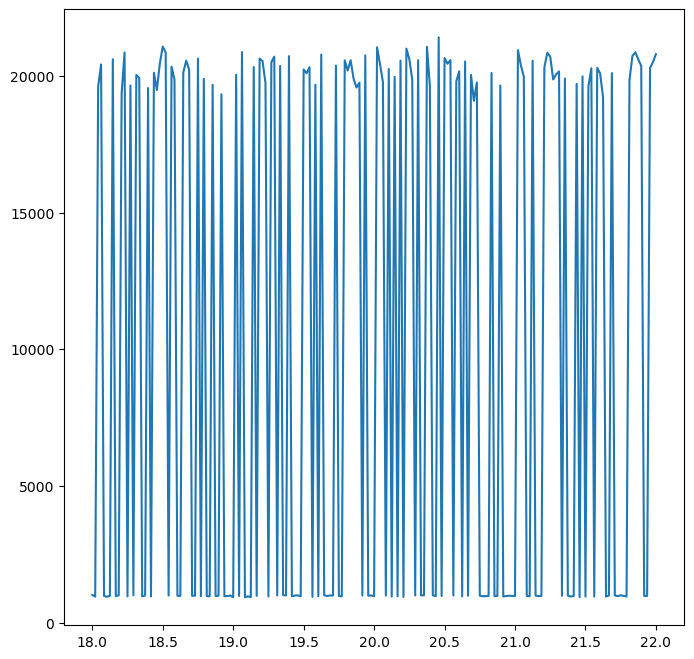

In [8]:
# show the data with time sequence
plt.figure( figsize=(8,8) )
x = np.linspace(18,22,len(br))
plt.plot(x,br)

/var/folders/l5/222hwgzd5nz4v415zl9k5_5w0000gn/T/ipykernel_8791/4230351505.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nums, bins, hist=is_hist, kde=is_kde, rug=is_rug, \


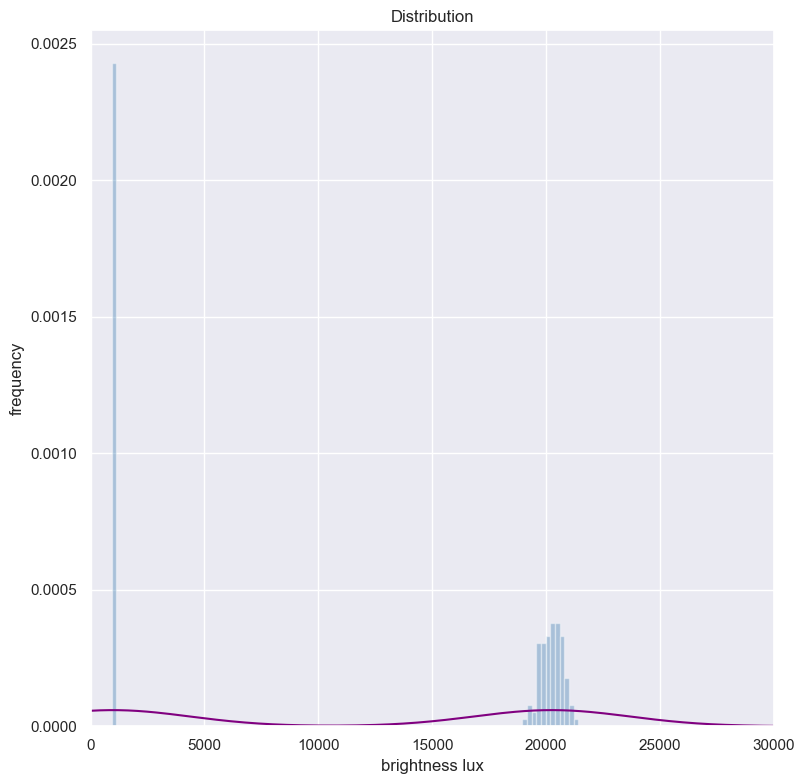

In [9]:
# show the distribution
plt.figure( figsize=(8,8) )
draw_distribution_histogram(br,100,0,30000)

Fitting 109 distributions:  95%|█████████████▎| 104/109 [00:17<00:01,  3.55it/s]/Users/wanrylin/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  99%|█████████████▊| 108/109 [00:22<00:00,  1.06it/s]/Users/wanrylin/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = q

              sumsquare_error          aic          bic  kl_div  ks_statistic  \
norminvgauss         0.000001  2432.483445 -3617.803312     inf      0.456652   
invgauss             0.000001  2420.627313 -3613.621578     inf      0.447813   
levy                 0.000001  2418.658463 -3618.658729     inf      0.445885   
invgamma             0.000002  2356.124071 -3542.999025     inf      0.330022   
gengamma             0.000002  2357.191028 -3516.730428     inf      0.325800   

                 ks_pvalue  
norminvgauss  2.608557e-37  
invgauss      8.022181e-36  
levy          1.675107e-35  
invgamma      3.138719e-19  
gengamma      9.681539e-19  


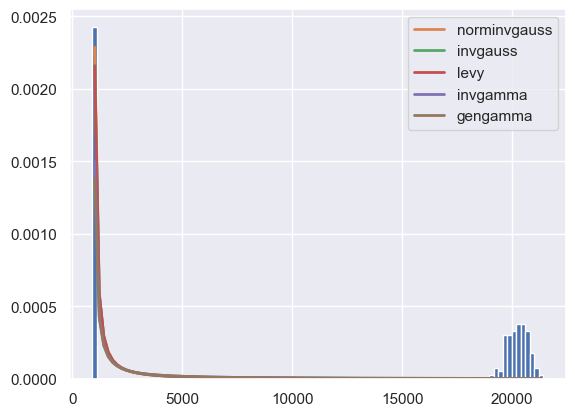

In [10]:
# use fitter to find the distribution
from fitter import Fitter

f = Fitter(br)  
f.fit()  
print(f.summary()) 

### It fits not well obviously

In [11]:
# grab some basic parameters
avg = np.mean(br)
print('average:',avg)
# print('mode:',np.bincount(br))
print('median:',np.median(br))
print('mini:',np.min(br))
print('max:',np.max(br))

average: 10658.865284974094
median: 19089.0
mini: 925
max: 21412


Fitting 109 distributions:  44%|██████▌        | 48/109 [00:09<00:09,  6.13it/s]/Users/wanrylin/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:3382: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  94%|█████████████▏| 103/109 [00:32<00:05,  1.08it/s]/Users/wanrylin/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
 

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
levy             0.000001  2418.658401 -3618.658707     inf      0.445885   
invgauss         0.000001  2418.182264 -3612.607624     inf      0.454038   
invgamma         0.000002  2356.124107 -3542.999213     inf      0.330022   
pareto           0.000002  2353.468726 -3519.777957     inf      0.326078   
mielke           0.000003  2312.114448 -3480.268694     inf      0.328613   

             ks_pvalue  
levy      1.675119e-35  
invgauss  7.246655e-37  
invgamma  3.138512e-19  
pareto    8.993748e-19  
mielke    4.580072e-19  


/Users/wanrylin/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


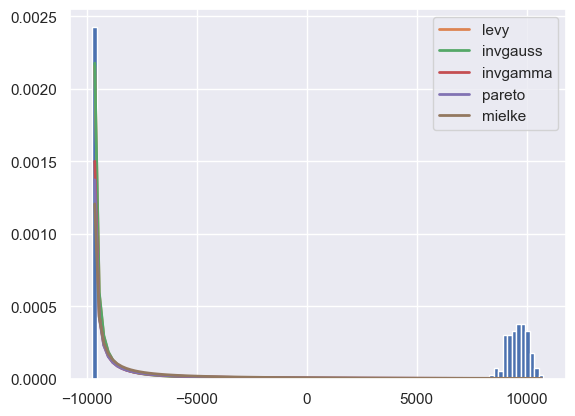

In [12]:
# remove the average value
br_ac = br - avg
f = Fitter(br_ac)  
f.fit()  
print(f.summary()) 

/var/folders/l5/222hwgzd5nz4v415zl9k5_5w0000gn/T/ipykernel_8791/4230351505.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nums, bins, hist=is_hist, kde=is_kde, rug=is_rug, \


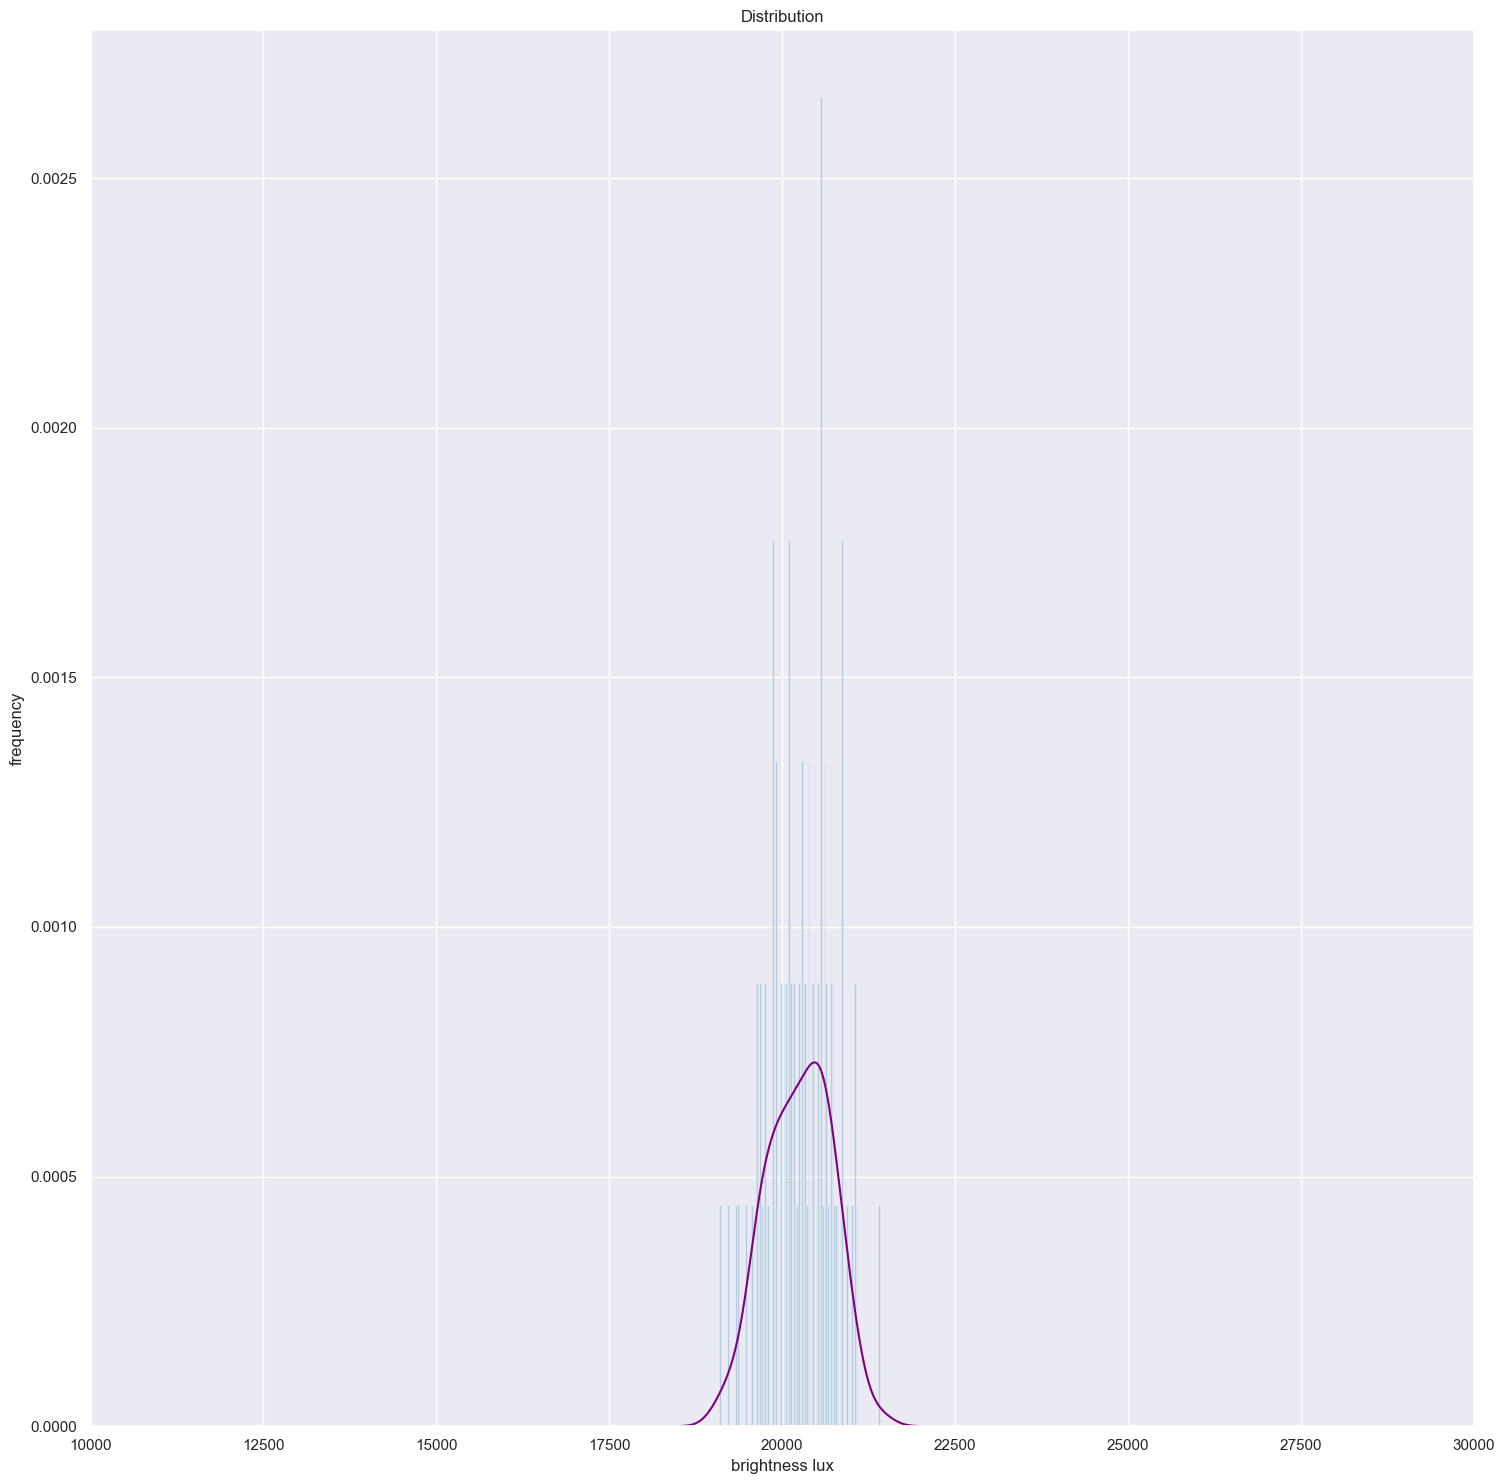

In [16]:
# if we just concern the data around 20000
br_2 = br[br > 10000]

# show the distribution
plt.figure( figsize=(15,15) )
draw_distribution_histogram(br_2,100,10000,30000)

Fitting 109 distributions:  97%|█████████████▌| 106/109 [00:45<00:03,  1.14s/it]/Users/wanrylin/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions: 100%|██████████████| 109/109 [01:08<00:00,  1.60it/s]


             sumsquare_error          aic          bic  kl_div  ks_statistic  \
gennorm             0.000019  1624.117403 -1483.722893     inf      0.053996   
johnsonsb           0.000019  1622.982816 -1478.561961     inf      0.050482   
beta                0.000019  1622.308970 -1478.421003     inf      0.051595   
cosine              0.000019  1609.270694 -1487.373920     inf      0.049879   
levy_stable         0.000019  1612.206118 -1477.722790     inf      0.062243   

             ks_pvalue  
gennorm       0.925285  
johnsonsb     0.955149  
beta          0.946643  
cosine        0.959380  
levy_stable   0.823802  


/Users/wanrylin/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


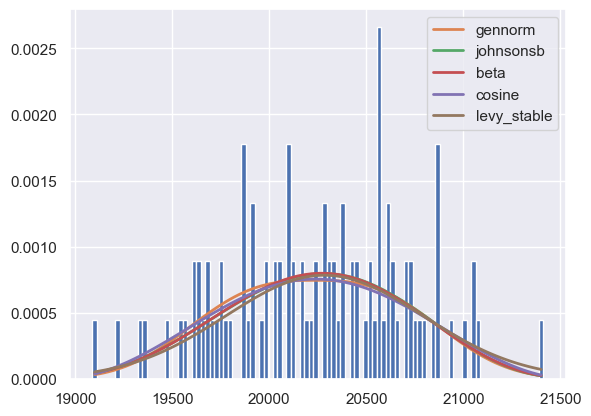

In [17]:
f2 = Fitter(br_2)  
f2.fit()  
print(f2.summary()) 

In [21]:
f2.get_best()

{'gennorm': {'beta': 2.8241163141169965,
  'loc': 20234.244478085697,
  'scale': 753.4897373619024}}

/var/folders/l5/222hwgzd5nz4v415zl9k5_5w0000gn/T/ipykernel_8791/4230351505.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nums, bins, hist=is_hist, kde=is_kde, rug=is_rug, \


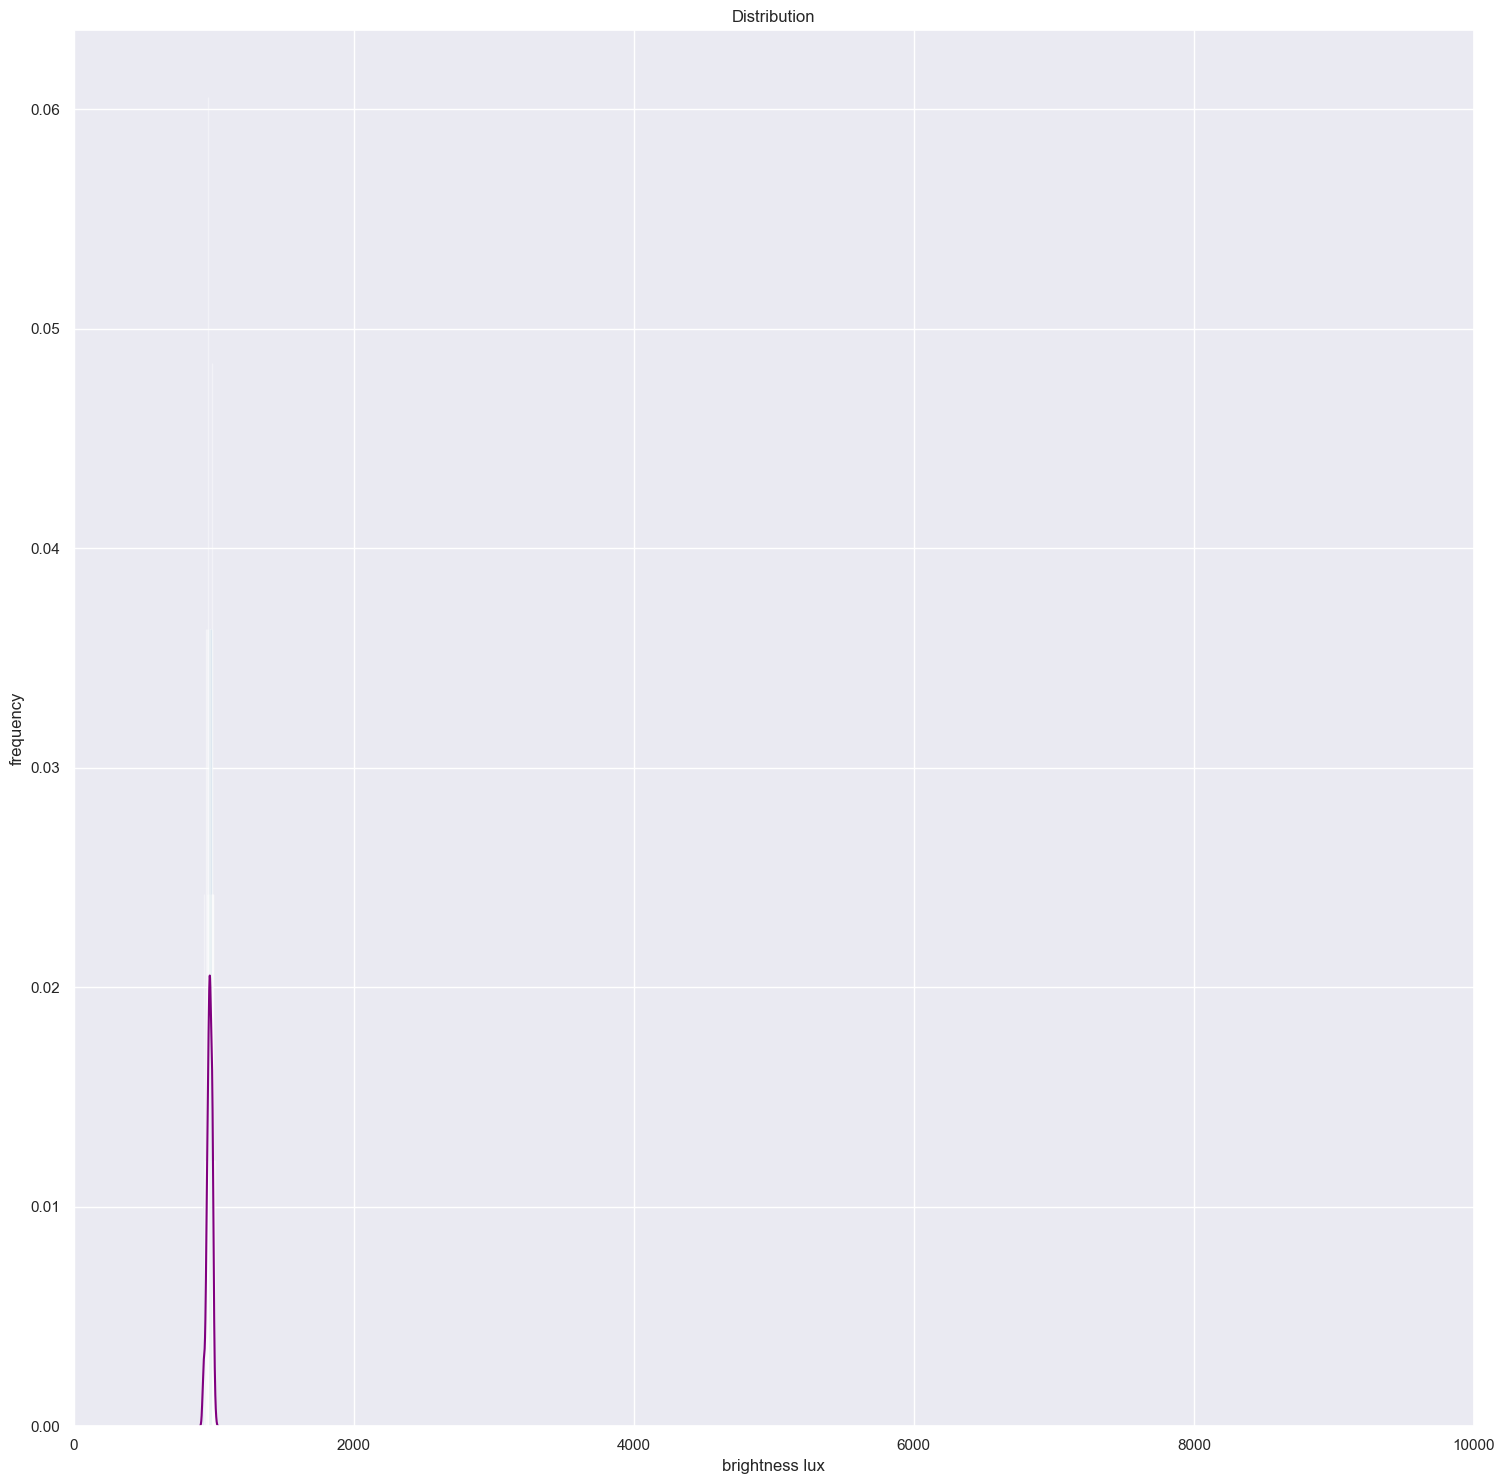

In [22]:
# if we just concern the data around 1000
br_1 = br[br < 10000]

# show the distribution
plt.figure( figsize=(15,15) )
draw_distribution_histogram(br_1,100,0,10000)

Fitting 109 distributions:  29%|████▍          | 32/109 [00:06<00:16,  4.73it/s]/Users/wanrylin/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  96%|█████████████▍| 105/109 [00:27<00:03,  1.19it/s]/Users/wanrylin/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args

               sumsquare_error         aic         bic  kl_div  ks_statistic  \
beta                  0.015313  960.873683 -821.110754     inf      0.051164   
johnsonsb             0.015317  960.450822 -821.083557     inf      0.051217   
genhyperbolic         0.015352  967.403041 -816.297895     inf      1.000000   
pearson3              0.015353  963.642710 -825.425389     inf      0.056937   
norminvgauss          0.015367  966.266178 -820.770336     inf      0.058309   

               ks_pvalue  
beta            0.952005  
johnsonsb       0.951603  
genhyperbolic   0.000000  
pearson3        0.897039  
norminvgauss    0.880751  


/Users/wanrylin/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


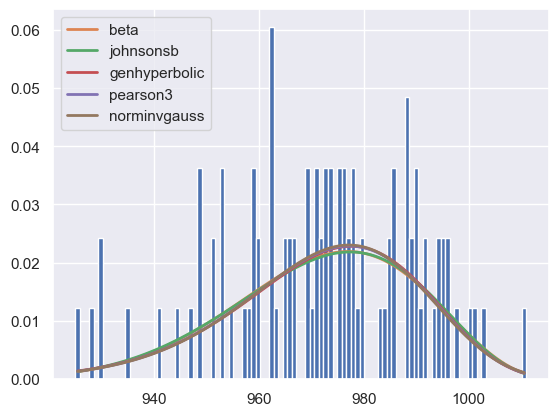

In [23]:
f1 = Fitter(br_1)  
f1.fit()  
print(f1.summary()) 

## It shows the first half fits beta distribution best
## the second half fits generalized normal distribution best